In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Task 5.2

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

n = 100 
probs =  np.linspace(0, 1, 10)
num_iterations = 20
clustering_coefficients = []

for p in probs:
    mean_clustering_coefficient = 0
    for i in range(num_iterations):
        er_graph = nx.erdos_renyi_graph(n, p)
        clustering_coefficient = nx.average_clustering(er_graph)
        mean_clustering_coefficient += clustering_coefficient
    mean_clustering_coefficient /= num_iterations
    clustering_coefficients.append(mean_clustering_coefficient)



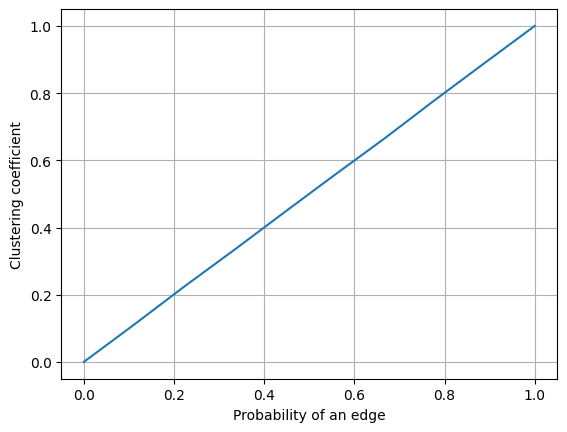

In [47]:
plt.plot(probs, clustering_coefficients)
plt.xlabel('Probability of an edge')
plt.ylabel('Clustering coefficient')
plt.grid()
plt.show()

# Task 5.3

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

def draw_community_graph(N=20, num_communities=4, p_within=0.3, p_between=0.05):
    
    G = nx.Graph()

    # intra-community edges
    node_community_mapping = {}
    for i in range(num_communities):
        nodes = range(i * N, (i + 1) * N)
        G.add_nodes_from(nodes)
        node_community_mapping.update({node: i for node in nodes})
        for u in nodes:
            for v in nodes:
                if u != v and random.random() < p_within:
                    G.add_edge(u, v)
                    G[u][v]['width'] = 0.6

    # inter-community edges
    for i in range(num_communities):
        for j in range(i + 1, num_communities):
            for u in range(i * N, (i + 1) * N):
                for v in range(j * N, (j + 1) * N):
                    if random.random() < p_between:
                        G.add_edge(u, v)
                        G[u][v]['width'] = 0.3

    community_colors =  plt.cm.tab10(np.linspace(0, 1, num_communities))

    node_colors = [community_colors[node_community_mapping[node]] for node in G.nodes()]

    # Draw the graph with community colors
    pos = nx.spring_layout(G)
    width = [G[u][v]['width'] for u, v in G.edges()]
    clustering_coefficient = nx.average_clustering(G)

    return G, pos, node_colors, width, clustering_coefficient


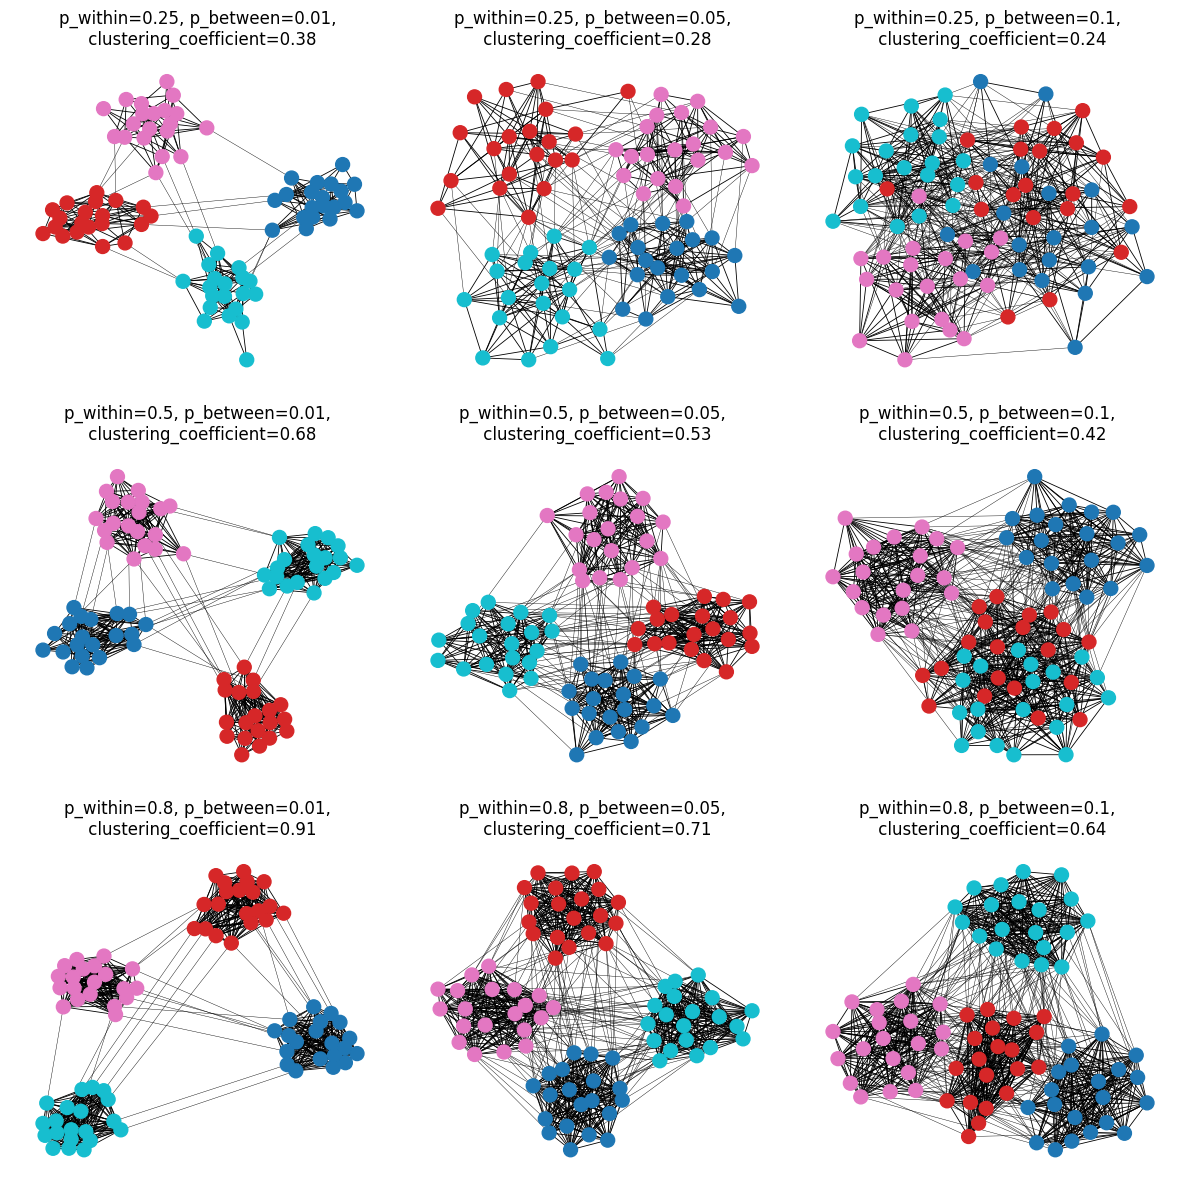

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
parameters = [(0.25, 0.01), (0.25, 0.05), (0.25, 0.1), (0.5, 0.01), (0.5, 0.05), (0.5, 0.1), (0.8, 0.01), (0.8, 0.05), (0.8, 0.1)]

for i, ax in enumerate(axes.ravel()):
    p_within, p_between = parameters[i]
    G, pos, node_colors, width, clustering_coefficient = draw_community_graph(p_within=p_within, p_between=p_between)
    nx.draw(G, pos, with_labels=False, node_size=100, node_color=node_colors, width=width, ax=ax)
    ax.set_title(f'p_within={p_within}, p_between={p_between}, \n clustering_coefficient={clustering_coefficient:.2f}')

plt.tight_layout()
plt.show()

# Task 5.4

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def get_WS_clustering_coefficient(p=0.1, N=100, k=4, num_iterations=10):
    avg_clustering = 0
    for _ in range(num_iterations):
        ws_graph = nx.watts_strogatz_graph(N, k=k, p=p)
        clustering = nx.average_clustering(ws_graph)
        avg_clustering += clustering
    avg_clustering /= num_iterations
    return avg_clustering

In [8]:
p_values = np.linspace(0, 1, 10) 
k_values = [2, 4, 6, 8]
num_iterations = 10
clustering_coefficients = {2: [], 4: [], 6: [], 8: []}
for k in k_values:
    for p in p_values:
        clustering_coefficient = get_WS_clustering_coefficient(p=p, k=k, num_iterations=num_iterations)
        clustering_coefficients[k].append(clustering_coefficient)


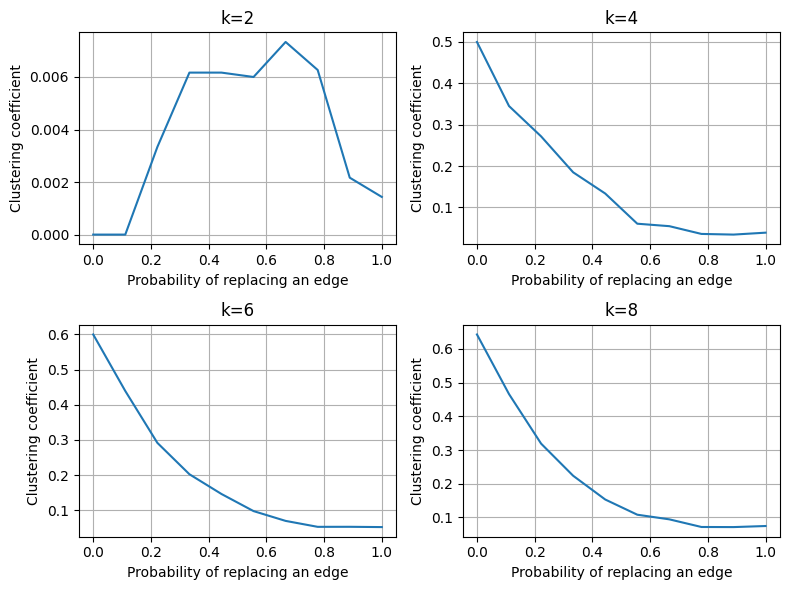

In [9]:
# plot the dependence of the clustering coefficient on the probability of rewiring for different values of k
fig, ax = plt.subplots(figsize=(8, 6), nrows=2, ncols=2)
ax = ax.ravel()
for i, k in enumerate(k_values):
    ax[i].plot(p_values, clustering_coefficients[k])
    ax[i].set_xlabel('Probability of replacing an edge')
    ax[i].set_ylabel('Clustering coefficient')
    ax[i].set_title(f'k={k}')
    # grid
    ax[i].grid(True)
plt.tight_layout()

# Task 5.6

In [3]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

def configuration_model(degree_sequence):
    num_iter = 0

    # Initializaztion
    G = nx.MultiGraph()
    degrees = np.array(degree_sequence)
    
    for i in range(len(degree_sequence)):
        G.add_node(i)

    while any(degrees > 0) and num_iter < 1000:

        i = np.random.choice(np.where(degrees > 0)[0])
        degrees[i] -= 1
        j = np.random.choice(np.where(degrees > 0)[0])
        degrees[j] -= 1
        G.add_edge(i, j)
        num_iter += 1

    return G

Converged: True


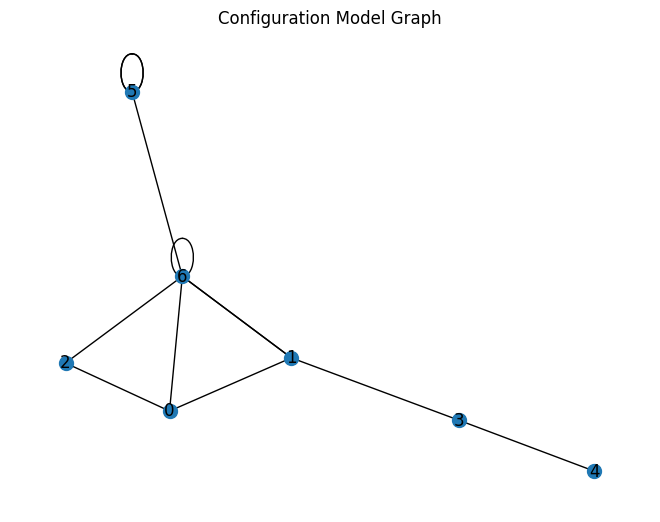

In [6]:
degree_sequence = [3, 4, 2, 2, 1, 5, 7]


G = configuration_model(degree_sequence)

# Check if the degree sequence is preserved
converged = np.all([G.degree(node) == degree for node, degree in enumerate(degree_sequence)])

print("Converged:", converged)

# Visualize the generated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.title("Configuration Model Graph")
plt.show()

Converged: True


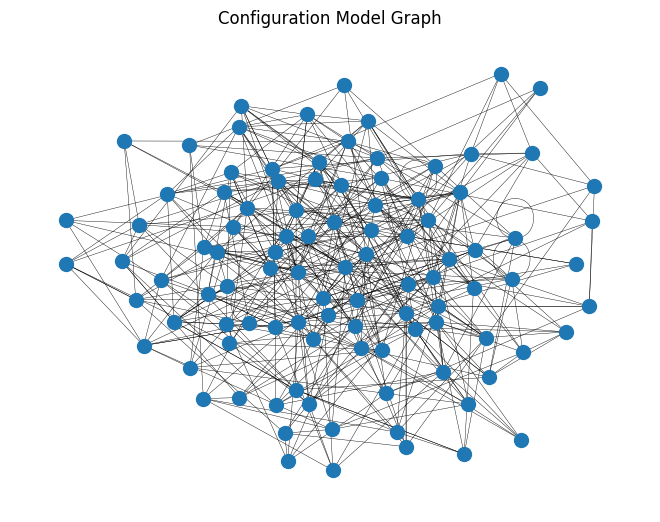

In [103]:
G = nx.erdos_renyi_graph(100, 0.1)
degree_sequence = [degree for node, degree in G.degree()]
G = configuration_model(degree_sequence)

converged = np.all([G.degree(node) == degree for node, degree in enumerate(degree_sequence)])

print("Converged:", converged)

# Visualize the generated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100, width=0.3)
plt.title("Configuration Model Graph")
plt.show()